# **Capitulo 2: Ejercicio 1**

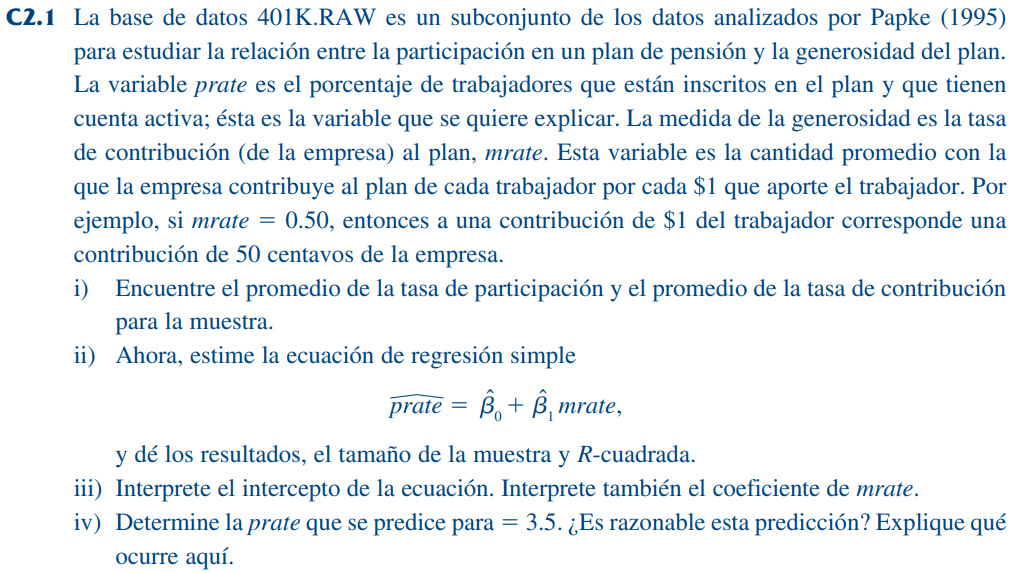

In [2]:
import pandas as pd
import statsmodels.api as sm
from wooldridge import data as wd

In [3]:
# Cargar la base de datos 401K
data = wd('401k')
data.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


In [4]:
# Variables de interés
prate = data['prate']  # Tasa de participación
mrate = data['mrate']  # Tasa de contribución

# i) Promedio de prate y mrate
mean_prate = prate.mean()
mean_mrate = mrate.mean()

print(f"Promedio de prate: {mean_prate:.2f}")
print(f"Promedio de mrate: {mean_mrate:.2f}")

Promedio de prate: 87.36
Promedio de mrate: 0.73


In [5]:
# ii) Estimación de la ecuación de regresión simple
X = sm.add_constant(mrate)  # Agregar un término constante para el intercepto
model = sm.OLS(prate, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.10e-27
Time:                        07:21:04   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0755      0.563    147.484      0.0

In [6]:
# iii) Interpretación del intercepto y coeficiente
intercept = model.params['const']
coef_mrate = model.params['mrate']

print(f"Intercepto (β0): {intercept:.2f}")
print(f"Coeficiente de mrate (β1): {coef_mrate:.2f}")

Intercepto (β0): 83.08
Coeficiente de mrate (β1): 5.86


**Interpretaciones**
- **Intercepto ($\beta_0$)**: Cuando $mrate = 0$, se espera que el 83.08% de los trabajadores participen.
- **Coeficiente ($\beta_1$)**: Cada aumento unitario en $mrate$ incrementa la tasa de participación en 5.85 puntos porcentuales.

In [7]:
# iv) Predicción de prate para mrate = 3.5
mrate_value = 3.5
predicted_prate = intercept + coef_mrate * mrate_value
print(f"Predicción de prate para mrate = 3.5: {predicted_prate:.2f}")

Predicción de prate para mrate = 3.5: 103.59


**¿Es razonable?** No, porque la predicción supera el 100%.

In [8]:
# v) Variación explicada por R-cuadrada
r_squared = model.rsquared
print(f"R-cuadrada: {r_squared:.3f}")

R-cuadrada: 0.075
